<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [21]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [2]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [3]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [4]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [11]:
#Coke or Pepsi?
#binomial random variable n=30
#0 - Pepsi
import random
random.seed(10)
sample = [random.randint(0,1) for _ in range(30)]
print(sample)
#uniform dist - null hypothesis

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [12]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe() #not 50/50

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


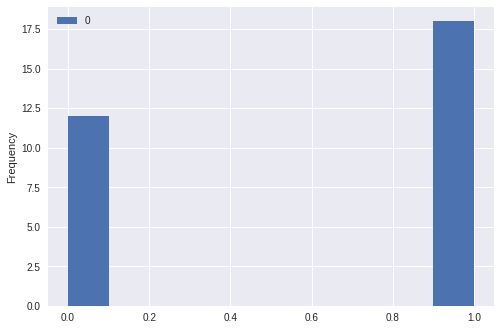

In [13]:
df.plot.hist();

In [14]:
#hypothesis tests for confirming or deconfirming significance

import scipy
scipy.stats.ttest_1samp(df[0], 0.5) #sample mean = mew 
#null hypothesis - coke and pepsi pref is equal
#p value for preference is 2.5% (low) - reject null
#negative stat is prefering pepsi, 0

Ttest_1sampResult(statistic=1.0992421631894096, pvalue=0.2807046476465548)

In [0]:
#degrees of freedom - variance
#decreases with sample size
#increase df - increase spread/variation
#Q-Q (quantile quantile) plot is less linear 
#ex.more difference between (25% on normal, 25% on t)

# test stat = observed mean - null mean/sample standard error
# P(population mean > test statistic) right tail P(X>x)
# P(X<x) left tail
#2P(X > abs(x)) two tail

In [15]:
#Calculate test statistics from scratch
#sample standard error
from math import sqrt
df[0].std()/sqrt(30)

0.09097176522946843

In [17]:
df[0].std()/sqrt(30000) #error lowers with sample size

0.0028767798089123055

In [18]:
#test statistic
(df[0].mean()-0.5) / (df[0].std() / (30**(1/2)))

1.0992421631894094

In [22]:
#reusable test statistic function
def std(sample, mean):
  std = 0
  for obs in sample:
    std += (obs-mean)**2
  return (std/(len(sample)-1)) ** (1/2)

def calculate_t_stat(sample, null_hypothesis):
  sample_mean = sum(sample)/len(sample)
  sample_std = std(sample, sample_mean)
  return (sample_mean - null_hypothesis)/(sample_std/(len(sample) ** (1/2)))

#As n reaches infinity, mu hat approaches mu
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

calculate_t_stat(survey_data, 0.5)

2.364321853156195

In [23]:
#the std of above
pd.DataFrame(survey_data).std()

0    0.478518
dtype: float64

In [24]:
#test function
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [25]:
len(survey_data) #n=50

50

In [0]:
help(scipy.stats.t) #info on continuous random variable
help(t.cdf) #info on t's cumulative distribution function
#cdf = P(X=<x)

In [26]:
t = scipy.stats.t(len(survey_data)) #continuous random var for n=50
t.cdf(calculate_t_stat(survey_data, 0.5)) #cdf is nearly 1
#meaning it's highly likely the population mean is less or equal to the sample

0.9890062713232346

In [27]:
# A hacky solution
2 * (1 - t.cdf(calculate_t_stat(survey_data, 0.5)))

0.021987457353530804

In [0]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base

# Put the entire above "experiment" in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p value holds

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [1]:
# TODO - your code here!
#null 0.5 parties voted same way
#alternative parties voted significantly differently
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names = ['party', 'handicapped-infants', 'water-project', 'budget',
         'physician-fee-freeze', 'el-salvador-aid', 'religious_groups_in_schools',
         'anti-satellite-test-ban', 'aid-to-contras', 'mx-missle', 'immigration',
         'synfuels-corp-cutback','education-spending','superfund-right-to-sue',
         'crime', 'duty-free-exports', 'export-SAfrica']
df = pd.read_csv(url, header=None, names=names)
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious_groups_in_schools,anti-satellite-test-ban,aid-to-contras,mx-missle,immigration,synfuels-corp-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-SAfrica
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [2]:
#NaNs are incorrectly coded as garbage strings
#we do not want to alter the proportion of votes or make assumptions in this set
#and it is only being analyzed one issue at a time
#so I will convert issues and party to Series as needed and dropna
#also convert y and n to true binary
import numpy as np
df = df.replace({'?':np.nan, 'n':0, 'y':1})
df.head()
df.isnull().sum()

party                            0
handicapped-infants             12
water-project                   48
budget                          11
physician-fee-freeze            11
el-salvador-aid                 15
religious_groups_in_schools     11
anti-satellite-test-ban         14
aid-to-contras                  15
mx-missle                       22
immigration                      7
synfuels-corp-cutback           21
education-spending              31
superfund-right-to-sue          25
crime                           17
duty-free-exports               28
export-SAfrica                 104
dtype: int64

In [3]:
#hypothesis test 1
#null hyp: democrats and republicans voted the same way
#alternate hyp: democrats voted yes more than republicans
#needs to be a true Series and party needs to be num to pass 1_samp
#dem is 1 (so a relationship where they voted more is positive test stat)
#republicans are a big fat zero
budget = df[['party', 'budget']].dropna()
budget.isnull().sum()
budget = budget.replace({'democrat':1, 'republican':0})
budget = budget.set_index(budget.party)
budget = budget['budget']
type(budget)


pandas.core.series.Series

In [4]:
import scipy
from scipy import stats
scipy.stats.ttest_1samp(budget,0.5)
#positive t stat = dem lean
#p value is ... small. very small. considerably less than 1%
#from these we can reject null hypothesis


Ttest_1sampResult(statistic=4.054111833494141, pvalue=5.990782209503433e-05)

In [5]:
#hypothesis test 2
#null hyp: democrats and republicans voted the same way
#alternate hyp: republicans voted yes more than democrats
#for consistency we are looking for a negative test statistic
exports = df[['party', 'duty-free-exports']].dropna()
exports = exports.replace({'democrat':1, 'republican':0})
exports = exports.set_index(exports.party)
exports = exports['duty-free-exports']

scipy.stats.ttest_1samp(exports,0.5)
#negative t stat = rep lean
#p value is less than 1%
#from this we can reject null hypothesis

Ttest_1sampResult(statistic=-2.952109403201251, pvalue=0.0033392999115176587)

In [9]:
#hypothesis test 3
#null hyp: democrats and republicans voted the same way
#alternate hyp: republicans and democrats voted differently either way
water_project = df[['party', 'water-project']].dropna()
water_project = water_project.replace({'democrat':1, 'republican':0})
water_project = water_project.set_index(water_project.party)
water_project = water_project['water-project']

scipy.stats.ttest_1samp(water_project,0.5)
#the test stat has a very slight dem lean, under 1 compared to
#test stats of 4 and -2 from earlier
#the p value is almost 90%;
#it is not helpful for assessing chance
#the null hypothesis should not be rejected

Ttest_1sampResult(statistic=0.1523059926090089, pvalue=0.8790251758107944)